In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

import statsmodels.api as sm

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Загрузка данных

In [2]:
data = pd.read_csv("input/DataNew.csv", delimiter=";")
data.head()

data = data.drop(columns=['Год'])

# data = data.apply(lambda x: x - x.mean())

### Объяснение переменных
- $y_1$ - инвестиции в основной капитал, млн руб.
- $y_2$ - валовой региональный продукт (ВРП), млн.руб.
- $y_3$ - сумма доходов населения за год, млн руб.
- $x_1$ - финансовый результат деятельности (чистая прибыль)
- $x_2$ - прямые иностранные инвестиции, млн USD
- $x_3$ - среднегодовая численности занятых, тыс чел.
- $x_4$ - стоимость основных фондов, млн. руб
- $x_5$ - степень износа основных фондов, %
- $x_6$ - затраты на научные исследования и разработки, млн руб.
- $x_7$ - объём инновационных товаров работ услуг, млн руб.
- $x_8$ - экспорт, млн USD
- $x_9$ - импорт, млн. USD
- $x_{10}$ - сумма остатков вкладов на счетах в Банке России, млн. руб.
- $x_{11}$ - прожиточный минимум в регионе РФ (г. Москва), тыс.руб.

### Системы уравнений

#### Система независимых уравнений
$$
\begin{cases}
y_1 = \beta_{11}x_{1} + \beta_{21}x_{2} + \epsilon \\
y_2 = \beta_{21}x_{} + \beta_{22}x_{2} + \beta_{23}x_{3} + \beta_{24}x_{4} + \beta_{25}x_{5} + \beta_{26}x_{6} + \beta_{27}x_{7} + \beta_{28}x_{8} - \beta_{29}x_{9} + \epsilon \\
y_3 = \beta_{31}x_{1} + \beta_{32}x_{2} + \beta_{33}x_{3} + \beta_{34}x_{4} + \beta_{35}x_{5} + \beta_{36}x_{6} + \beta_{37}x_{7} + \beta_{38}x_{8} - \beta_{39}x_{9} + \beta_{310}x_{10} + \beta_{311}x_{11} + \epsilon \\
\end{cases}
$$

#### Система независимых уравнений
$$
\begin{cases}
y_1 = \beta_{11}x_{1} + \beta_{21}x_{2} + \epsilon \\
y_2 = \\
y_3 = \\
\end{cases}
$$

#### Система независимых уравнений
$$
\begin{cases}
y_1 = \beta_{11}x_{1} + \beta_{21}x_{2} + \epsilon \\
y_2 = \\
y_3 = \\
\end{cases}
$$

#### Альтернативная система
$$ВРП = Y_1 + Y_ 2+ Y_3 + Y_4 + Y_5$$

$$
\begin{cases}
Y_{\text{1-Внутренний сектор}} = Y_{\text{4-Факторы предложения}} + Y_{\text{2-Внешний сектор}} + Y_{\text{5-Экзогенные переменные}} + x{\dots}\\

Y_{\text{2-Внешний сектор}} = Y_{\text{5-Экзогенные переменные}} + x{\dots}\\

Y_{\text{3-Бюджетная система}} = Y_{\text{1-Внутренний сектор}} + Y_{\text{4-Факторы предложения}} + Y_{\text{5-Экзогенные переменные}} + x{\dots}\\

Y_{\text{4-Факторы предложения}} = Y_{\text{1-Внутренний сектор}} + Y_{\text{2-Внешний сектор}} + Y_{\text{3-Бюджетная система}} + x{\dots}\\

Y_{\text{5-Экзогенные переменные}} = x{\dots}\\
\end{cases}
$$

# Матрица коэффициентов межфакторной корреляции

<Axes: >

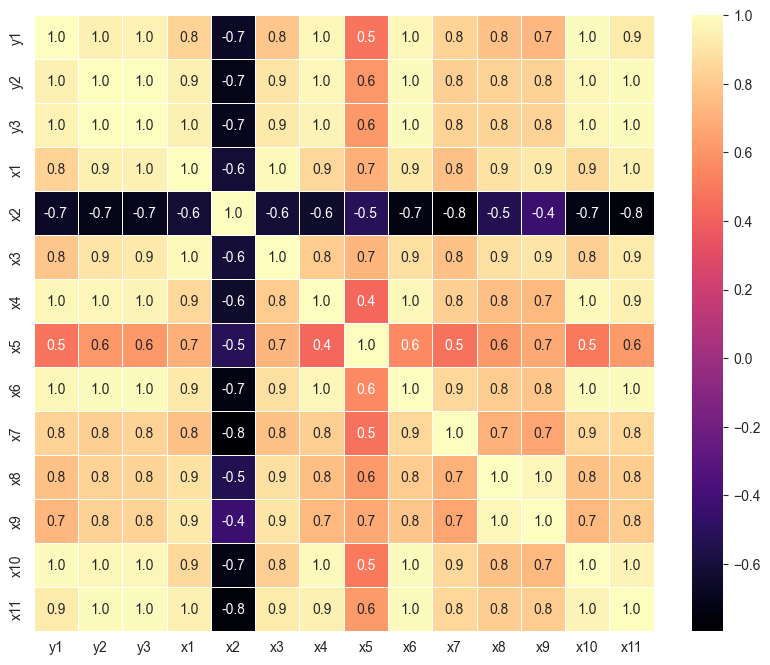

In [3]:
fig, ax = plt.subplots(figsize=(10, 8))

# data.corr()

# sns.heatmap(data.corr(), annot=True, fmt=".1f", linewidth=.5)
# sns.heatmap(data.corr(), annot=True, fmt=".1f", linewidth=.5, cmap='crest')
# sns.heatmap(data.corr(), annot=True, fmt=".1f", linewidth=.5, cmap='cubehelix')
# sns.heatmap(data.corr(), annot=True, fmt=".1f", linewidth=.5, cmap='vlag')
# sns.heatmap(data.corr(), annot=True, fmt=".1f", linewidth=.5, cmap='icefire')
sns.heatmap(data.corr(), annot=True, fmt=".1f", linewidth=.5, cmap='magma')

<Axes: >

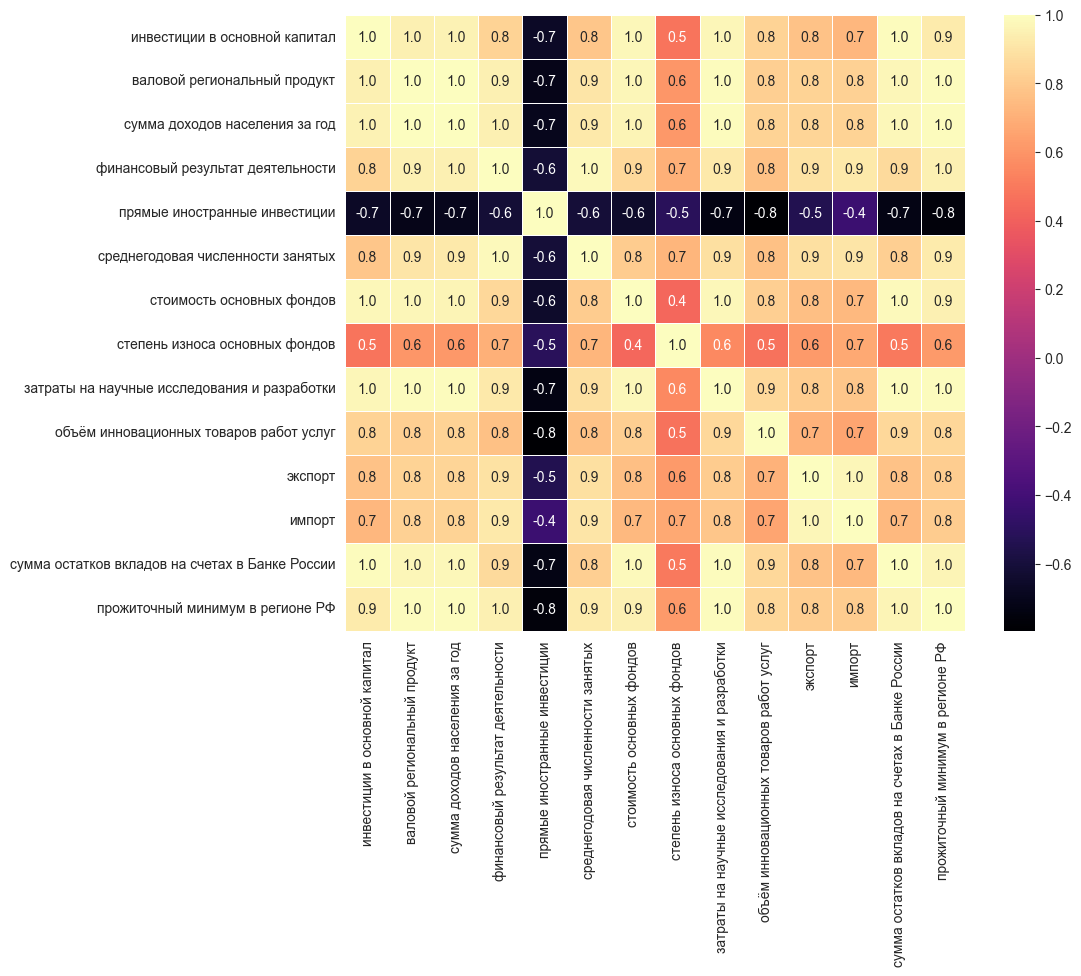

In [4]:
un_data = data.copy()
un_data.columns = ['инвестиции в основной капитал', 'валовой региональный продукт', 'сумма доходов населения за год',
                   'финансовый результат деятельности', 'прямые иностранные инвестиции',
                   'среднегодовая численности занятых', 'стоимость основных фондов', 'степень износа основных фондов',
                   'затраты на научные исследования и разработки', 'объём инновационных товаров работ услуг', 'экспорт',
                   'импорт', 'сумма остатков вкладов на счетах в Банке России', 'прожиточный минимум в регионе РФ']

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(un_data.corr(), annot=True, fmt=".1f", linewidth=.5, cmap='magma')

# Избавляемся от выбросов

In [5]:
data.shape

(25, 14)

**Z-оценка**

In [6]:
z = np.abs(stats.zscore(data))
data_clean = data[(z < 3).all(axis=1)]
data_clean.shape

(25, 14)

**Межквартильный размах (IQR)**

In [7]:
#find Q1, Q3, and interquartile range for each column
Q1 = data.quantile(q=.25)
Q3 = data.quantile(q=.75)
IQR = data.apply(stats.iqr)

#only keep rows in dataframe that have values within 1.5\*IQR of Q1 and Q3
data_clean = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
data_clean.shape  # без 20,21,22 годов

(24, 14)

data = data_clean

# Отбор переменных

In [8]:
data.head()

,y1,y2,y3,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
0,87211.83,328497.9,638450.60,228548.4,133850.11,63589.6,1212184.0,33.8,83359.41,25719.20,6171.0,6642.0,111458.0,1393.30
1,119302.33,695059.8,789466.92,488395.1,136468.87,64053.1,1272744.0,35.2,87820.24,25262.15,7260.0,7814.0,185861.0,1807.80
2,156215.00,1159034.0,962057.00,748241.8,139019.74,64516.6,1444737.0,32.4,92700.80,25720.20,8067.0,9194.0,309534.0,2185.00
3,173839.00,1370182.8,1393532.20,1008088.5,141496.62,64980.1,1841258.0,30.4,98088.36,24905.88,5545.0,12637.0,418289.0,2385.26
4,220396.00,1767476.7,1771073.00,1267935.2,143892.17,65573.6,2255912.0,35.1,104100.59,25084.01,6932.0,13817.0,589139.0,2918.55


In [9]:
y = data[['y1', 'y2', 'y3']]
y1 = y['y1']
y2 = y['y2']
y3 = y['y3']

In [10]:
X = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']]
x1 = X['x1']
x2 = X['x2']
x3 = X['x3']
x4 = X['x4']
x5 = X['x5']
x6 = X['x6']
x7 = X['x7']
x8 = X['x8']
x9 = X['x9']
x10 = X['x10']
x11 = X['x11']

In [11]:
class CustomLinearRegression():
    def __init__(self, y, x):
        self.y = y
        self.x = x
        self.x = sm.add_constant(self.x)
        # self.model = sm.OLS(self.y, self.x).fit_regularized(alpha=1., L1_wt=0.5, refit=True)
        self.model = sm.OLS(self.y, self.x).fit()

    def summary(self):
        print(self.model.summary())

    def pre(self):
        return self.model.predict(self.x)

    def F(self):
        return self.model.fvalue

    def p(self):
        return self.model.f_pvalue

    def current_p(self, i):
        return self.model.pvalues[i]

    def R2(self):
        return self.model.rsquared

    def R2_adj(self):
        return self.model.rsquared_adj

    def t(self):
        return self.model.tvalues

    def forward_selection(self):
        xi = []
        stop = False
        x_new = []  # список переменных, которые будут включены в модель
        x_len = len(self.x.columns)  # количество столбцов в датафрейме
        x_test = []
        for n in range(x_len):
            F_max = 0  # максимальное значение F
            p_max = 0  # максимальное значение p
            F_max_i = 0
            F_max_x = ''
            if not stop:
                for i in range(x_len):
                    if i not in xi:
                        x_test = x_new.copy()
                        x_test.append(self.x.columns[i])
                        F = CustomLinearRegression(self.y, self.x.loc[:, x_test]).F()
                        print(f"'x{i + 1}',", F)
                        if F > F_max:
                            F_max = F
                            F_max_i = i
                            F_max_x = f"x{i + 1}"
                x_new.append(F_max_x)
                xi.append(F_max_i)
                print(x_new)
                for j in range(len(x_new)):
                    p = CustomLinearRegression(self.y, self.x.loc[:, x_new]).current_p(j)
                    if p > 0.05:
                        stop = True
                        print(f'P-value: {p}')
                        break
        CustomLinearRegression(self.y, self.x.loc[:, x_new[:-1]]).summary()

    def correlation_map(self):
        return sns.heatmap(self.x.corr(), annot=True, fmt=".1f", linewidth=.5, cmap='magma')

## Оценка ранее предложенный систем уравнений
## Система независимых уравнений (Вариант 1)
$$
\begin{cases}
y_1 = \beta_{11}x_{1} + \beta_{21}x_{2} + \epsilon \\
y_2 = \beta_{21}x_{} + \beta_{22}x_{2} + \beta_{23}x_{3} + \beta_{24}x_{4} + \beta_{25}x_{5} + \beta_{26}x_{6} + \beta_{27}x_{7} + \beta_{28}x_{8} - \beta_{29}x_{9} + \epsilon \\
y_3 = \beta_{31}x_{1} + \beta_{32}x_{2} + \beta_{33}x_{3} + \beta_{34}x_{4} + \beta_{35}x_{5} + \beta_{36}x_{6} + \beta_{37}x_{7} + \beta_{38}x_{8} - \beta_{39}x_{9} + \beta_{310}x_{10} + \beta_{311}x_{11} + \epsilon \\
\end{cases}
$$

### Первое уравнение
$$y_1 = \beta_{11}x_{1} + \beta_{21}x_{2} + \epsilon$$

#### Исходное уравнение

In [12]:
fn1 = pd.concat([x1, x2], axis=1)
CustomLinearRegression(y1, fn1).summary()

                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     30.60
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           4.42e-07
Time:                        15:05:55   Log-Likelihood:                -374.71
No. Observations:                  25   AIC:                             755.4
Df Residuals:                      22   BIC:                             759.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.237e+06   1.09e+06      1.140      0.2

### Второе уравнение
$$y_2 = \beta_{21}x_{} + \beta_{22}x_{2} + \beta_{23}x_{3} + \beta_{24}x_{4} + \beta_{25}x_{5} + \beta_{26}x_{6} + \beta_{27}x_{7} + \beta_{28}x_{8} - \beta_{29}x_{9} + \epsilon$$

#### Исходное уравнение

In [13]:
fn2 = pd.concat([x1, x2, x3, x4, x5, x6, x7, x8, x9], axis=1)
CustomLinearRegression(y2, fn2).summary()

                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     434.6
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           1.77e-16
Time:                        15:05:55   Log-Likelihood:                -360.35
No. Observations:                  25   AIC:                             740.7
Df Residuals:                      15   BIC:                             752.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.348e+06   1.22e+07      0.358      0.7

#### Исходное уравнение с исключением статистически незначимых параметров

In [14]:
# Методом прямого включения
CustomLinearRegression(y2, fn2).forward_selection()

'x1', nan
'x2', 191.1969596691522
'x3', 23.685010172898256
'x4', 103.65337487942448
'x5', 316.68089257480517
'x6', 13.048963804944966
'x7', 1170.5275923222632
'x8', 46.68020238781015
'x9', 53.32433022667895
'x10', 49.95945829473225
['x7']
'x1', 46.68020238781015
'x2', 117.36570459102226
'x3', 23.373442819605057
'x4', 65.75683419008746
'x5', 157.29349777822546
'x6', 29.954746916828277
'x8', 46.68020238781015
'x9', 44.22323862491175
'x10', 49.259328876219016
['x7', 'x5']
P-value: 0.1252499331861059
                            OLS Regression Results                            
Dep. Variable:                     y2   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     46.68
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           5.74e-07
Time:                        15:05:55   Log-Likelihood:                -416.08
No. Observations:       

### Третье уравнение
$$y_3 = \beta_{31}x_{1} + \beta_{32}x_{2} + \beta_{33}x_{3} + \beta_{34}x_{4} + \beta_{35}x_{5} + \beta_{36}x_{6} + \beta_{37}x_{7} + \beta_{38}x_{8} - \beta_{39}x_{9} + \beta_{310}x_{10} + \beta_{311}x_{11} + \epsilon$$

#### Исходное уравнение

In [15]:
fn3 = pd.concat([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11], axis=1)
CustomLinearRegression(y3, fn3).summary()

                            OLS Regression Results                            
Dep. Variable:                     y3   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     440.2
Date:                Sat, 08 Apr 2023   Prob (F-statistic):           7.68e-15
Time:                        15:05:55   Log-Likelihood:                -341.94
No. Observations:                  25   AIC:                             707.9
Df Residuals:                      13   BIC:                             722.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.65e+07   8.47e+06     -1.948      0.0

#### Исходное уравнение с исключением статистически незначимых параметров

In [16]:
# Методом прямого включения
CustomLinearRegression(y3, fn3).forward_selection()

'x1', nan
'x2', 216.824608385113
'x3', 22.00359059354009
'x4', 128.27448966364852
'x5', 300.12365707435544
'x6', 13.76456075333395
'x7', 1406.8769147138992
'x8', 54.46147536041515
'x9', 56.049506674194134
'x10', 52.178365633797
'x11', 413.17865513415524
'x12', 1178.41141090036
['x7']
'x1', 54.46147536041515
'x2', 154.16310829440826
'x3', 26.393347379933644
'x4', 89.9353708272453
'x5', 161.40655600089576
'x6', 35.82156593522714
'x8', 54.46147536041514
'x9', 52.16819251888927
'x10', 59.070541224245424
'x11', 197.67979686639512
'x12', 563.6260765119591
['x7', 'x12']


KeyError: "['x12'] not in index"

## Система независимых уравнений (Вариант 2)

### Первое уравнение

In [17]:
# Методом прямого включения
CustomLinearRegression(y1, X).forward_selection()

'x1', nan
'x2', 52.99777771064182
'x3', 18.60194486019938
'x4', 36.57596972657383
'x5', 506.28596923302973
'x6', 6.711218981227363
'x7', 337.28102130847486
'x8', 51.636776917129374
'x9', 34.45930325244187
'x10', 26.752695883463335
'x11', 1238.9606072777826
'x12', 142.73550354686932
['x11']
'x1', 142.73550354686935
'x2', 83.47911991028828
'x3', 69.796929014737
'x4', 98.3519908301989
'x5', 242.4110123700284
'x6', 79.04047566940962
'x7', 371.4854009354387
'x8', 72.88942759931474
'x9', 68.80068619012233
'x10', 68.57555080355229
'x12', 142.73550354686935
['x11', 'x7']
'x1', 72.88942759931474
'x2', 54.729140165189555
'x3', 50.89558382202995
'x4', 66.33996678265319
'x5', 166.5301685829934
'x6', 52.70783196730701
'x8', 72.88942759931474
'x9', 46.637880837610865
'x10', 46.49888019850435
'x12', 72.88942759931474
['x11', 'x7', 'x5']
P-value: 0.3035198810157115
                            OLS Regression Results                            
Dep. Variable:                     y1   R-squared:         

### Второе уравнение

In [18]:
# Методом прямого включения
CustomLinearRegression(y2, X).forward_selection()

'x1', nan
'x2', 191.1969596691522
'x3', 23.685010172898256
'x4', 103.65337487942448
'x5', 316.68089257480517
'x6', 13.048963804944966
'x7', 1170.5275923222632
'x8', 46.68020238781015
'x9', 53.32433022667895
'x10', 49.95945829473225
'x11', 375.374127512182
'x12', 1255.7654830425352
['x12']


KeyError: "None of [Index(['x12'], dtype='object')] are in the [columns]"

### Третье уравнение

In [19]:
# Методом прямого включения
CustomLinearRegression(y3, X).forward_selection()

'x1', nan
'x2', 216.824608385113
'x3', 22.00359059354009
'x4', 128.27448966364852
'x5', 300.12365707435544
'x6', 13.76456075333395
'x7', 1406.8769147138992
'x8', 54.46147536041515
'x9', 56.049506674194134
'x10', 52.178365633797
'x11', 413.17865513415524
'x12', 1178.41141090036
['x7']
'x1', 54.46147536041515
'x2', 154.16310829440826
'x3', 26.393347379933644
'x4', 89.9353708272453
'x5', 161.40655600089576
'x6', 35.82156593522714
'x8', 54.46147536041514
'x9', 52.16819251888927
'x10', 59.070541224245424
'x11', 197.67979686639512
'x12', 563.6260765119591
['x7', 'x12']


KeyError: "['x12'] not in index"